In [32]:
from bs4 import BeautifulSoup
import requests
head = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}
r = requests.get("https://www.melon.com/song/detail.htm?songId={}".format(11127145),headers=head)

bs = BeautifulSoup(r.text)
lyric = bs.find("div", id = "d_video_summary")

In [33]:
lyric

In [5]:
f = open("./event.txt", "w", encoding='utf-8')
f.write(BeautifulSoup(str(lyric).replace("<br/>", "\n")).text.strip())
f.close()

In [6]:
"https://www.melon.com/song/detail.htm?songId={}".format(35945927)

'https://www.melon.com/song/detail.htm?songId=35945927'

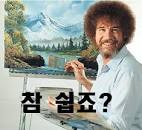    

In [ ]:
chart_url = "https://www.melon.com/chart/index.htm"
r = requests.get(chart_url, headers=head)
bs = BeautifulSoup(r.text)
for x in bs.findAll("tr", id='lst50'):
    print(f"https://www.melon.com/song/detail.htm?songId={x['data-song-no']}")
for x in bs.findAll("tr", id='lst100'):
    print(f"https://www.melon.com/song/detail.htm?songId={x['data-song-no']}")

In [66]:
# list comprehension (리스트 축약형)
total = [x['data-song-no'] for x in bs.findAll("tr", id='lst50')] + [x['data-song-no'] for x in bs.findAll("tr", id='lst100')]

In [ ]:
for url in total:
    print(f"https://www.melon.com/song/detail.htm?songId={url}")

In [72]:
import os

In [73]:
os.mkdir("./song")

In [74]:
r = requests.get("https://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu")
bs = BeautifulSoup(r.text)
bs2 = bs.find("table", id='revolution_main_table').findAll("tr")

In [142]:
total = []
for idx, x in enumerate(bs2):
    try:
        print(idx, x.findAll("a")[-1].text)
        total.append(x.findAll("a")[-1].text)
    except:
        print(idx, "해당번호에는 데이터 없음")

0 해당번호에는 데이터 없음
1 해당번호에는 데이터 없음
2 해당번호에는 데이터 없음
3 [필독] 제목에는 특수 문자 사용을 절대 금지합니다.- 2010년 2월 24일
4 
뽐뿌게시판 업자신고 프로세스 개선 안내

5 해당번호에는 데이터 없음
6 [지마켓] 백산수 무라벨 24입 (17,820원/무배)
7 [지마켓] 백산수 무라벨 24입 (17,820원/무배)
8 해당번호에는 데이터 없음
9 [큐텐]삼다수 2리터 12개(12,380/무료)
10 [큐텐]삼다수 2리터 12개(12,380/무료)
11 해당번호에는 데이터 없음
12 [지마켓] 마레스 뉴클리퍼 오리발 가방포함 (48,600원/무배)
13 [지마켓] 마레스 뉴클리퍼 오리발 가방포함 (48,600원/무배)
14 해당번호에는 데이터 없음
15 [네이버] 스타벅스 바닐라 에스프레소 12개입 + 토트백 (28,900원 / 무료)
16 [네이버] 스타벅스 바닐라 에스프레소 12개입 + 토트백 (28,900원 / 무료)
17 해당번호에는 데이터 없음
18 [G마켓] ASUS EX A320M-GAMING STCOM (71,130/3,000)
19 [G마켓] ASUS EX A320M-GAMING STCOM (71,130/3,000)
20 해당번호에는 데이터 없음
21 [쿠팡/와우회원] (끌올) LG전자 트롬 드럼세탁기 F24WDWP 24kg (967,310원/무료배송)
22 [쿠팡/와우회원] (끌올) LG전자 트롬 드럼세탁기 F24WDWP 24kg (967,310원/무료배송)
23 해당번호에는 데이터 없음
24 [하우스앱] 프로쉬 식기세척기 세제 3개 SET(틴케이스+커팅케이스 증정)(30,712원/무배)
25 [하우스앱] 프로쉬 식기세척기 세제 3개 SET(틴케이스+커팅케이스 증정)(30,712원/무배)
26 해당번호에는 데이터 없음
27 [위메프] 프로즌 사천식 얼큰한 원팩 마라탕 2팩 (14,900원/무료)
28 [위메프] 프로즌 사천식 얼큰한 원팩 마라탕 2팩 (14,900원/무료)
29 해당번호에는 데이터 없

In [134]:
a = {1,2,3,3,3}

In [135]:
type(a)

set

In [136]:
a

{1, 2, 3}

In [137]:
b = { 2,2,2,3,3,}

In [141]:
a | b

{1, 2, 3}

In [147]:
import re
p = re.compile("([0-9]+[,][0-9]+)")

In [162]:
total2 = []
for x in list(set(total)):
    try:
        #print(f"{x} -- {p.findall(x)[0]}" )
        total2.append(p.findall(x)[0])
    except:
        pass

In [167]:
int(total2[0].replace(",", ""))

18850

In [170]:
total3 = [int(x.replace(',', '')) for x in total2]

In [174]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [173]:
sorted(total3, reverse=True)

[967310,
 622000,
 228470,
 71130,
 55000,
 48600,
 46050,
 40480,
 30712,
 28900,
 24020,
 18850,
 18360,
 17820,
 16000,
 15830,
 14900,
 12380,
 10200,
 1290]

In [181]:
import random

In [196]:
help(random.Random.randint)

Help on function randint in module random:

randint(self, a, b)
    Return random integer in range [a, b], including both end points.



In [203]:
a = [[random.randint(1,100) for x in range(3)] for x in range(10)]

In [204]:
a

[[42, 27, 99],
 [61, 45, 98],
 [42, 14, 48],
 [49, 34, 46],
 [95, 11, 83],
 [2, 44, 54],
 [49, 93, 53],
 [32, 70, 14],
 [49, 83, 57],
 [87, 51, 46]]

In [209]:
list(sorted(a, key=lambda x: x[1], reverse=True))

[[49, 93, 53],
 [49, 83, 57],
 [32, 70, 14],
 [87, 51, 46],
 [61, 45, 98],
 [2, 44, 54],
 [49, 34, 46],
 [42, 27, 99],
 [42, 14, 48],
 [95, 11, 83]]

In [212]:
b = sorted(a, key=lambda x: x[1], reverse=True)

In [214]:
b

[[49, 93, 53],
 [49, 83, 57],
 [32, 70, 14],
 [87, 51, 46],
 [61, 45, 98],
 [2, 44, 54],
 [49, 34, 46],
 [42, 27, 99],
 [42, 14, 48],
 [95, 11, 83]]

In [220]:
a[0][1] = 45

In [221]:
a

[[42, 45, 99],
 [61, 45, 98],
 [42, 14, 48],
 [49, 34, 46],
 [95, 11, 83],
 [2, 44, 54],
 [49, 93, 53],
 [32, 70, 14],
 [49, 83, 57],
 [87, 51, 46]]

In [223]:
sorted(sorted(a, key=lambda x: x[1], reverse=True), key=lambda x : x[2] )

[[32, 70, 14],
 [87, 51, 46],
 [49, 34, 46],
 [42, 14, 48],
 [49, 93, 53],
 [2, 44, 54],
 [49, 83, 57],
 [95, 11, 83],
 [61, 45, 98],
 [42, 45, 99]]